# Effets non linéaires en mécanique, épisode I

On va dans cete série de notebooks observer l'influence des termes non linéaires dans l'intégration des équations différentielles que l'on peut croiser en mécanique et en particulier l'effet sur les périodes d'oscillations. Comme d'habitude, ce premier volet commence par introduire quelques notions utiles pour la résolution numérique dans une première partie, puis vous avez votre travail à faire qui sera décrit dans la seconde partie.

## Première partie, outils utiles

### Intégration numérique avec odeint

On a vu en électricité comment implémenter la méthode d'Euler pour résoudre des équations différentielles. Il est important de comprendre comment celle-ci marche (car c'est la base de quasiment toutes les méthodes d'intégration numérique d'équadiff), mais il est aussi important de savoir que cette méthode est très «crue» et qu'il existe des outils bien plus performants à notre disposition. Un de ces outils est la fonction `odeint` disponible depuis `scipy` (abrégé en `sp`) et plus particulièrement son sous-module `integrate` qu'on appellera donc via `sp.integrate.odeint(f, y0, t)`. Cette fonction prend trois arguments obligatoires:
* `f` correspond à une fonction `f(y, t)` qui va définir l'équation différentielle (ou le système d'équations différentielles) de sorte que
$$
\frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t)
$$ où $y$ peut être une fonction inconnue du temps à valeur vectorielle. C'est ce qui va nous sauver puisqu'on voit que `odeint` ne semble pouvoir résoudre *que* des équations du premier ordre alors qu'en mécanique on a généralement des équations du second ordre. Fort heureusement, si on a une équation différentielle du second ordre du type
$$
\ddot{x} = g(x, \dot{x}, t)
$$ alors elle peut se réécrire comme un systèmes d'équations du premier ordre
$$ 
\left\{
\begin{array}{rcl}
    \dfrac{\mathrm{d}x}{\mathrm{d}t} &=& \dot{x} \\
    \dfrac{\mathrm{d}\dot{x}}{\mathrm{d}t} &=& g(x, \dot{x}, t)
\end{array}
\right.
$$
En posant $y = \begin{pmatrix} x \\ \dot{x} \end{pmatrix}$, on a bien
$$
\frac{\mathrm{d}y}{\mathrm{d}t}
    = \frac{\mathrm{d}}{\mathrm{d}t}\!
                \begin{pmatrix} x \\ \dot{x} \end{pmatrix}
    = \begin{pmatrix} \dot{x} \\ g(x, \dot{x}, t) \end{pmatrix}
    = f(y, t)
$$ dans le sens où tous les éléments du second membre peuvent se calculer connaissant les deux composantes du vecteur $y$.
* `y0` correspond à la condition initiale. Ici, ce sera le doublet $\begin{pmatrix} x(0) \\ \dot{x}(0) \end{pmatrix}$ qui sera donné sous forme d'une liste `[x0, xpoint0]` pour cet exemple d'équadiff du second ordre.
* `t` correspond à la liste (ou le `np.array`) des instants pour lesquels on veut obtenir une valeur pour le $y$ choisi. Néanmoins, ce n'est pas parce que vous ne demandez que quelques instants que `odeint` ne va pas passer par des points intermédiaires pour assurer une bonne précision de calcul.

À noter que `odeint` renvoie un `np.array` avec autant de lignes que d'instants dans `t`. Pour récupérer le résultat, il va falloir faire une transposition sous la forme:
```python
solution = sp.integrate.odeint(f, y0, t)
x, xpoint = solution.transpose()
```

### Exemple connu

Prenons un oscillateur amorti classique d'équation différentielle
$$
\ddot{x} + \frac{\omega_0}{Q}\,\dot{x} + {\omega_0}^2\,x = 0
$$
On a alors le système différentiel
$$ 
\left\{
\begin{array}{rcl}
    \dfrac{\mathrm{d}x}{\mathrm{d}t} 
        &=& \dot{x} \\
    \dfrac{\mathrm{d}\dot{x}}{\mathrm{d}t} 
        &=& - \dfrac{\omega_0}{Q}\,\dot{x} - {\omega_0}^2\,x
\end{array}
\right.
$$
En posant $y = \begin{pmatrix} x \\ \dot{x} \end{pmatrix}$, le code informatique permettant l'intégration numérique donne

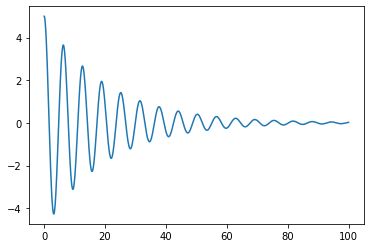

In [1]:
# Import des modules utiles
import numpy as np
import scipy as sp
import scipy.integrate

# Définition de l'équation différentielle
def f(y, t):
    """
    y est un vecteur à deux composantes: x et xpoint.
    On commence donc par récupérer ces deux valeurs et
    on les utilise pour calculer les deux dérivées.
    On définit aussi les valeurs de w0 et Q.
    """
    x, xpoint = y
    w0 = 1
    Q = 10
    derivee_x = xpoint
    derivee_xpoint = -w0 / Q * xpoint - w0**2 * x
    return [derivee_x, derivee_xpoint]

# Intégration par odeint
y0 = [5, 0] # x(0) = 5 et xpoint(0) = 0
t = np.linspace(0, 100, 1000)
solution = sp.integrate.odeint(f, y0, t)

# Récupération de x et xpoint
x, xpoint = solution.transpose()

# Vérification graphique
import matplotlib.pyplot as plt

plt.plot(t, x)


### Déterminer une période

On a déjà une fois déterminé une période en comptant le nombre de passage par 0. Si vous détectez 7 passages par 0, alors vous aurez 6 demi-périodes donc 3 périodes complètes. Néanmoins, on peut aussi ne détecter que les passage par 0 dans le même sens (avec une condition du type `if x[i] <= 0 < x[i+1]`) donc pour 4 passages détecter, le temps écoulé entre le premier et le dernier correspondra à 3 périodes.

## Deuxième partie: ce que vous devez faire.

Pour la mise en application de ce notebook, il s'agit de résoudre l'équation du pendule simple
$$
\ddot{\theta} + \frac{g}{\ell}\,\sin(\theta) = 0
$$
lâché sans vitesse initiale pour différentes valeurs initiales $\theta_0$ de $\theta$ qui correspondent alors à l'amplitude du mouvement. Il faut alors déterminer la période pour chaque amplitude et représenter graphiquement l'évolution de cette période avec l'amplitude pour voir comment on s'écarte (ou non) de la valeur valable pour les petites oscillations.

À la fin, il faut stocker dans la variable `reponse`(SANS ACCENT) la liste des périodes calculées pour chaque amplitude et visualiser l'évolution de cette période en fonction de l'amplitude.

ATTENTION: pour que ce soit plus parlant pour vous, les valeurs $\theta_0$ sont données en degrées, mais pour que l'intégration se fasse correctement, il faut qu'elles soient en radians: à vous de faire la conversion (Hint: il y a la fonction `np.radians` qui permet de ne pas se tromper sur la conversion)

ATTENTION Bis: il n'y aura, lors de l'évaluation de votre code, PAS le même nombre de $\theta_0$. Il faut donc vous assurer que votre code fonctionne même si on enlève ou on rajoute des valeurs à la liste de départ. Je vous conseille de créer une fonction `integre_et_donne_periode(theta0)` qui procède à l'intégration via `odeint` puis détermine la période et la renvoie afin de l'intégrer dans une boucle pour remplir petit à petit la liste des périodes attendues.

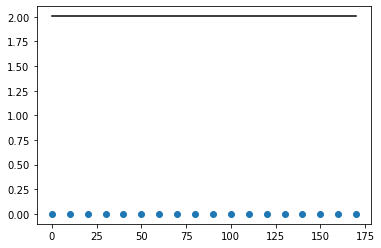

In [3]:
# Les importations utiles
import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot

# Les données utiles, à savoir:
# * g, l'accélération de la pesanteur choisie (attention, on n'est pas forcément sur Terre)
# * ell, la longueur du fil
# * liste_theta0, la liste des angles initiaux de lâcher
# * t, le np.array des temps à utiliser pour l'intégration numérique
from donnees import *

# On peut calculer la période pour les petits angles
T0 = 2 * np.pi * np.sqrt(ell / g)

# À vous de jouer, commencez par définir la fonction à appeler en boucle
def integre_et_donne_periode(theta0):
    # À vous de remplir les blancs et définir la variable `periode`
    
    
    
    
    return periode

# Initialisation à la mauvaise valeur mais à la bonne taille
reponse = [0] * len(liste_theta0) 

# Puis appelez en boucle la fonction précédente pour remplacer,
# dans la variable `reponse`, les différentes périodes




# Enfin, regardez l'évolution et comparez à T0

plt.plot([min(liste_theta0), max(liste_theta0)], [T0, T0], 'k')
plt.plot(liste_theta0, reponse, 'o')

